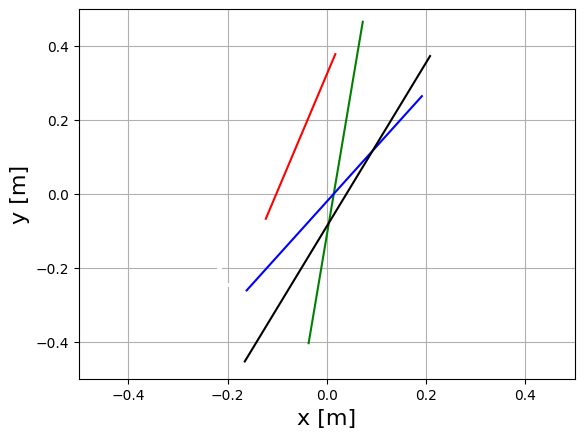

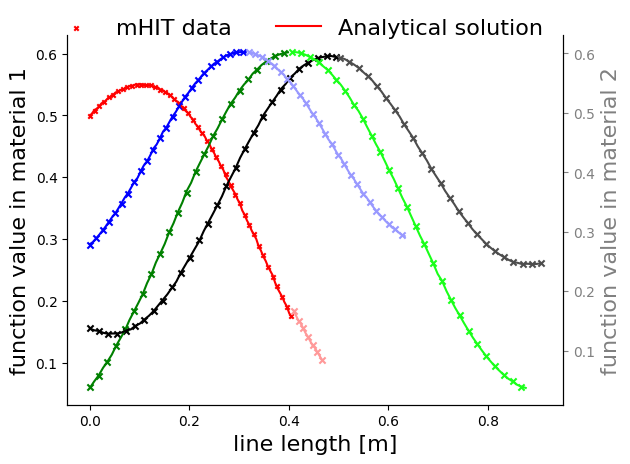

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, cos, pi, lambdify, printing
from matplotlib.colors import to_rgb
import colorsys

def generate_random_lines(num_lines=5, min_length=0.5, domain=[-0.5, 0.5]):
    lines = []
    for _ in range(num_lines):
        while True:
            # Generate a random start point
            x_start, y_start = np.random.uniform(
                domain[0],
                domain[1],
                2,
            )
            # Calculate the maximum length based on the start point and the domain
            # Generate a random length
            length = 0.5

            # Calculate the end point
            x_end, y_end = np.random.uniform(
                domain[0],
                domain[1],
                2,
            )
            if x_start < 0 and x_end > 0 and y_start < 0 and y_end > 0:
                # If it does, add the line to the list and break the loop
                lines.append(((x_start, y_start), (x_end, y_end)))
                if ((x_start - x_end) ** 2 + (y_start - y_end) ** 2) ** 0.5 > length:
                    break
    return lines


# Generate x and y values
x_values = np.linspace(-0.5, 0.5, 100)
y_values = np.linspace(-0.5, 0.5, 100)
# Choose a value for t
t_value = 10  # replace with your desired value
# Calculate z values
X, Y = np.meshgrid(x_values, y_values)
# load Z values from file



# Plot the function


# Use the function string as the label in the colorbar
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
color = [
    "red",
    "green",
    "blue",
    "black",
]
# Add three random lines with minimum length of 0.5
generated_lines = generate_random_lines(
    num_lines=3, min_length=0.5, domain=[-0.5, 0.5]
)
for i, line in enumerate(generated_lines):
    (x_start, y_start), (x_end, y_end) = line
    plt.plot([x_start, x_end], [y_start, y_end], color=color[i])
plt.text(-0.25, -0.25, "1", color="white", fontdict={"size": 36})
plt.text(0.25, 0.25, "2", color="white", fontdict={"size": 36})
plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.xlabel("x [m]", fontsize=16)
plt.ylabel("y [m]", fontsize=16)

an=np.loadtxt("ctrap_sieverts_at10.txt",skiprows=8)
an_2=np.loadtxt("ctrap_an2_sieverts_at10.txt",skiprows=8)
COMS = np.loadtxt("ctrap_an2_sieverts_at10.txt",skiprows=8)
# Split the data into x, y, and color
x_COMS = COMS[:, 0]
y_COMS = COMS[:, 1]
x_an=an[:, 0]
y_an=an[:, 1]
x_an_2=an_2[:, 0]
y_an_2=an_2[:, 1]
color_COMS = COMS[:, 2]
original_color_an=an[:, 2]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
for i in range(len(generated_lines)):
    x_start, y_start = generated_lines[i][0]
    x_end, y_end = generated_lines[i][1]
    # Ensure the end points are within [0, 1]
    x_end = np.clip(x_end, 0, 1)
    y_end = np.clip(y_end, 0, 1)
    x_line = np.linspace(x_start, x_end, 100)
    y_line = np.linspace(y_start, y_end, 100)
    xy_line = np.column_stack((x_line, y_line))
    indices = np.where((xy_line[:, 0] > 0) & (xy_line[:, 1] > 0))
    length = ((x_start - x_line) ** 2 + (y_start - y_line) ** 2) ** 0.5
    
    original_color = to_rgb(color[i])
    h, l, s = colorsys.rgb_to_hls(*original_color)

    # Increase the lightness
    lighter_l = min(l + 0.3, 1)  # increase lightness by 30%, but don't exceed 1

    # Convert the HLS color back to RGB
    lighter_color = colorsys.hls_to_rgb(h, lighter_l, s)
    first_index = indices[0][0] if indices[0].size > 0 else len(length)
    color_line_an=griddata(
        (x_an, y_an), original_color_an, (x_line, y_line), method="nearest"
    )
    color_line_an2=griddata(
        (x_an_2, y_an_2), an_2[:,2], (x_line, y_line), method="nearest"
    )
    color_line = griddata(
        (x_COMS, y_COMS), color_COMS, (x_line, y_line), method="nearest"
    )  # !!! Due to the "nearest" method, the marker may connect with the nearest mesh point
    # across the boundary, which may be not alligned with the analytical line

    if i == 0:
        
        ax1.scatter(
            length[:first_index:2],
            color_line[:first_index:2],
            color=color[i],
            marker="x",
            s=10,
            label="mHIT data",
        )
        ax1.plot(
            length[:first_index],
            color_line_an[:first_index],
            color=color[i],label="Analytical solution")
        ax2.scatter(
            length[first_index::2],
            color_line[first_index::2],
            color=lighter_color,
            s=20,
            marker="x",
        )
        ax2.plot(
            length[first_index:],
            color_line_an2[first_index:],
            color=lighter_color)
        ax1.tick_params(axis="y")
        ax1.set_xlabel("line length [m]", fontsize=16)
        ax1.set_ylabel("function value in material 1", color="black", fontsize=16)
        ax2.set_ylabel("function value in material 2", color="grey", fontsize=16)
        ax2.tick_params(axis="y", color="grey", labelcolor="grey")
        ax1.spines["top"].set_visible(False)
        ax2.spines["top"].set_visible(False)
        ax1.legend(frameon=False, bbox_to_anchor=(1, 1.1),ncol=2, fontsize=16)
        
    else:
        
        ax1.scatter(
            length[:first_index:2],
            color_line[:first_index:2],
            color=color[i],
            marker="x",
            s=20,
        )
        ax1.plot(
            length[:first_index:],
            color_line_an[:first_index:],
            color=color[i])
        ax2.scatter(
            length[first_index::2],
            color_line[first_index::2],
            color=lighter_color,
            marker="x",
            s=20,
        )
        ax2.plot(
            length[first_index:],
            color_line_an2[first_index:],
            color=lighter_color)
plt.savefig("sieverts_trap_comparison_at100.png", dpi=300,bbox_inches='tight')
        
# plotfun()

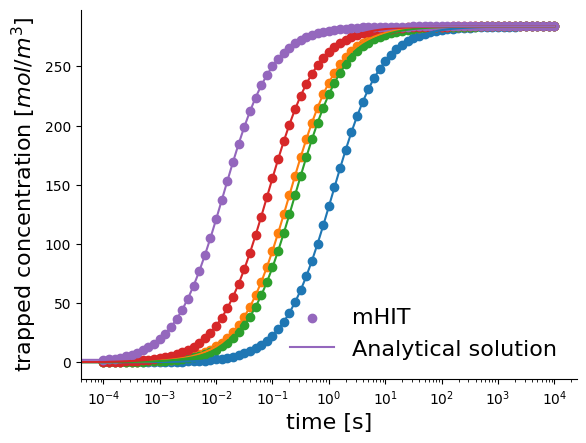

In [2]:
## load data from txt
ctrap_t= np.loadtxt("ctrap_sieverts_timedep_1.txt")
ctrap_t_2= np.loadtxt("ctrap_sieverts_timedep_2.txt")
ctrap_an_t= np.loadtxt("ctrap_an_sieverts_timedep.txt")
ctrap_an_t_2= np.loadtxt("ctrap_an2_sieverts_timedep.txt")
# for each column in ctrap_t, plot the data
for i in range(1, ctrap_t.shape[1]):
    ##plot data as comparison bewtween COMSOL and analytical
    plt.scatter(ctrap_t[:, 0], ctrap_t[:, i], )
    plt.plot(ctrap_an_t[:, 0], ctrap_an_t[:, i])
plt.scatter(ctrap_t_2[:, 0], ctrap_t_2[:, 1], label="mHIT")
plt.plot(ctrap_an_t_2[:, 0], ctrap_an_t_2[:, 1], label="Analytical solution")
plt.xscale("log")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend(frameon=False, fontsize=16)
plt.xlabel("time [s]", fontsize=16)
plt.ylabel(r"trapped concentration $[mol/m^3]$", fontsize=16)
plt.savefig("sieverts_trap_timedep_comparison.png", dpi=300,bbox_inches='tight')
